# target

compare truth level info with nominal

1. event number match

2. p4 vector dR match (bbll)

In [2]:
import os,shutil
import numpy as np
import ROOT
from ROOT import TCanvas, TLegend, TFile, TPaveLabel, TPaveText, TTree, TLorentzVector, TH1D, TVectorT, gStyle, THStack, gPad, TH2D
from ROOT import gROOT
import helper

In [3]:
# 1. get tfile
filename = "user.cgarvey.32744802._000002.output.root"
file = TFile(filename)
# 2. get ttree
nominal = file.Get("nominal")
truth = file.Get("truth")
print(nominal.GetEntries(), truth.GetEntries())

258576 4580000


In [4]:
eventNumber = TH1D ("eventNumber ","eventNumber" ,50 ,0,50)
m_bl1D = TH1D ("m_bl ","invariant mass of bl pair by truth match" ,50 ,0 ,300)
m_bl2D = TH2D ("m_bl", "masses of two lb pairs", 50 ,0 ,300, 50 ,0 ,300)

In [5]:
eventNumber.Reset()
# event match
nentry = 0
nominal.GetEntry(nentry)
nnumber = getattr(nominal, "eventNumber")
# for n in range(truth.GetEntries()):
for n in range(4000):
    truth.GetEntry(n)
    tnumber = getattr(truth, "eventNumber")
    if tnumber == nnumber:
        #####################################################
        ############# start analysis from here ##############
        #####################################################
        # construct p4 vector 
        ## truth level llbb
        p4s_truth_b = []
        p4s_truth_b.append(helper.p4_from_pt_eta_phi_m(truth, "MC_b_from_t"))
        p4s_truth_b.append(helper.p4_from_pt_eta_phi_m(truth, "MC_b_from_tbar"))
        # first element from t, second element from tbar

        ## lepton (el/mu/tau)
        prefixes = ['MC_Wdecay1_from_t', 'MC_Wdecay2_from_t', 'MC_Wdecay1_from_tbar','MC_Wdecay2_from_tbar']
        p4s_truth_lep = helper.get_leptons_from_truth(prefixes, truth)
            
        ## nominal level llbb (same as in minimax_lb.ipynb)
        p4s_lep = helper.GetLorenzP4List(nominal, 'lep')
        p4s_bjet = helper.GetLorenzP4List(nominal,'bjet')

        # dR match p4 vector: p4s_lep vs p4s_truth_lep; p4s_bjet vs p4s_truth_b
        ## arrange the p4s as [from_b , from_bbar]
        p4s_match_lep = helper.deltaR_match(p4s_truth_lep, p4s_lep, 0.4)
        p4s_match_bjet = helper.deltaR_match(p4s_truth_b, p4s_bjet, 0.4)
        
        # if one of the match failed, go to the next nominal event
        # if the match is successful:

        if len(p4s_match_lep)*len(p4s_match_bjet) != 0 :
            # draw the correct combination
            # fill hist
            m1 = (p4s_match_lep[0] + p4s_match_bjet[0]).M()/1000
            m2 = (p4s_match_lep[1] + p4s_match_bjet[1]).M()/1000
            # print(m1, m2)

            m_bl1D.Fill(m1)
            m_bl1D.Fill(m2)
            m_bl2D.Fill(m1, m2)


        #####################################################
        ############# end analysis from here ################
        #####################################################
        nentry += 1
        nominal.GetEntry(nentry)
        nnumber = getattr(nominal, "eventNumber")
        
print(nentry)

215


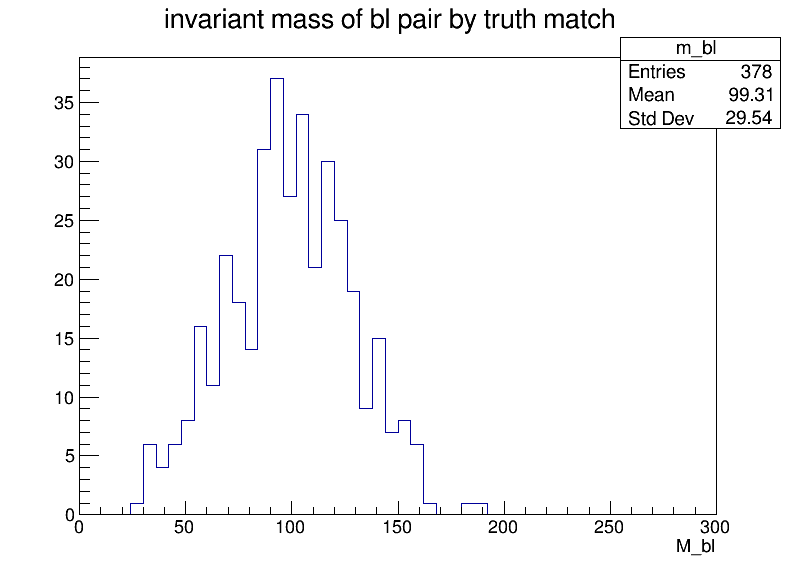

In [6]:
c1 = TCanvas('c1', 'canvas1', 0, 0, 800, 600 )
m_bl1D.Draw()
m_bl1D.GetXaxis().SetTitle("M_bl")

c1.Draw()

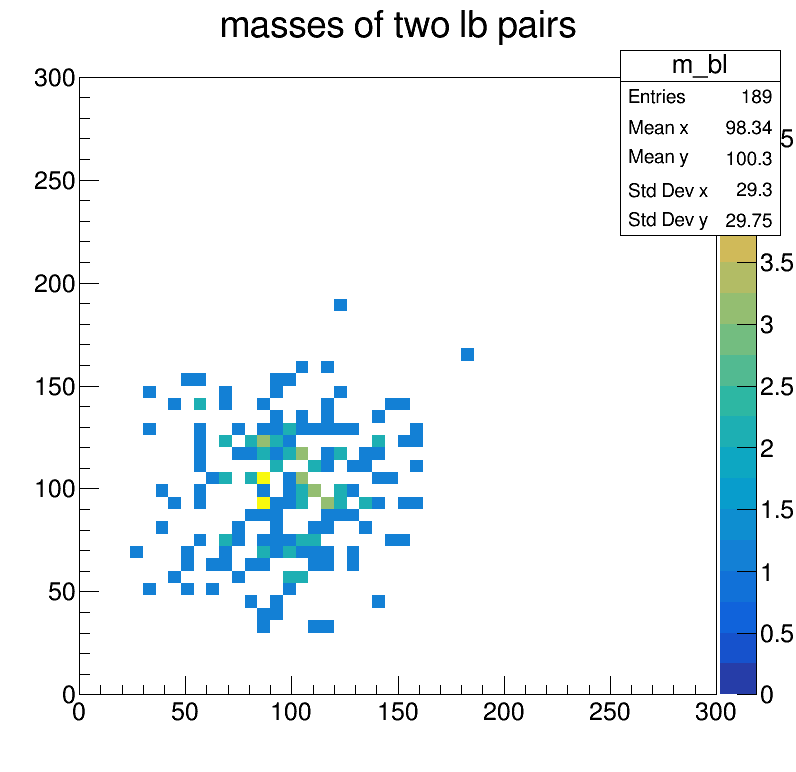

In [7]:
c2 = TCanvas('c2', 'canvas2', 0, 0, 800, 800 )
m_bl2D.Draw("COLZ")

c2.Draw()


In [8]:
def test(i):
    if i == 10:
        continue

SyntaxError: 'continue' not properly in loop (<ipython-input-8-aa6ba3bff871>, line 6)

In [ ]:
for i in range(200):
    test(i)
    print(i)

NameError: name 'helper' is not defined